In [1]:
import os
import sys

from matplotlib.pyplot import imshow, imread
from skimage.transform import rescale, resize
import matplotlib.pyplot as plt

#Keras:
import keras
from keras import backend as K
from keras.preprocessing.image import ImageDataGenerator
from keras.callbacks import LearningRateScheduler
from keras.optimizers import SGD
from keras.models import *
from keras.layers import *
from keras.optimizers import *
from keras.callbacks import ModelCheckpoint, LearningRateScheduler

#Custom Functions:
ROOT_DIR = os.path.abspath("../")
sys.path.append(ROOT_DIR)

from imports.utils.log_progress import log_progress
from imports.utils.visualization import Visualize
from imports.utils.enums import DATA_BASE_PATH, SHAPE
from imports.models.u_net import get_unet

/opt/conda/lib/python3.6/site-packages/h5py/__init__.py:36: FutureWarning: Conversion of the second argument of issubdtype from `float` to `np.floating` is deprecated. In future, it will be treated as `np.float64 == np.dtype(float).type`.
  from ._conv import register_converters as _register_converters
Using TensorFlow backend.


In [2]:
import warnings
warnings.filterwarnings("ignore")

In [3]:
from imports.models.losses import bce_dice_loss, dice_coeff
from keras.models import load_model, model_from_json

import keras.losses
keras.losses.custom_loss = bce_dice_loss

model = load_model('../saved_models/unet/unet1024_60epochs.h5', custom_objects={'bce_dice_loss': bce_dice_loss,'dice_coeff':dice_coeff})

In [ ]:
layers = [layer for layer in model.layers]
len(layers)

In [12]:
shape = (512,768)

from keras.models import Model
layer_outputs = [layer.output for layer in model.layers]
activation_model = Model(inputs=model.input, outputs=layer_outputs)

im = imread(DATA_BASE_PATH+'/01_train/images/img_1000.png')
im = resize(im,shape)
 
def get_intermediate_layer(n_layer,input_shape=(512,768)):
    new_model = Model(input=[model.layers[0].input], output=[model.layers[n_layer].output])
    activations = new_model.predict(im.reshape(1,input_shape[0],input_shape[1],3))
    shape = (activations.shape[1],activations.shape[2])
    n_filters = activations.shape[3]
    fig, axs = plt.subplots(ncols=4,nrows=n_layer//4,figsize=(20,(n_layer//4)*5))
    k = 0
    for i in range(n_layer//4):
        for j in range(4):
            axs[i,j].imshow(activations[0,:,:,k].reshape(shape))
            axs[i,j].axis('off')
            axs[i,j].set_title(f"Outputlayer: {n_layer}, Kernel: {k}")
            k += 1
    plt.subplots_adjust(wspace=0.1, hspace=0)

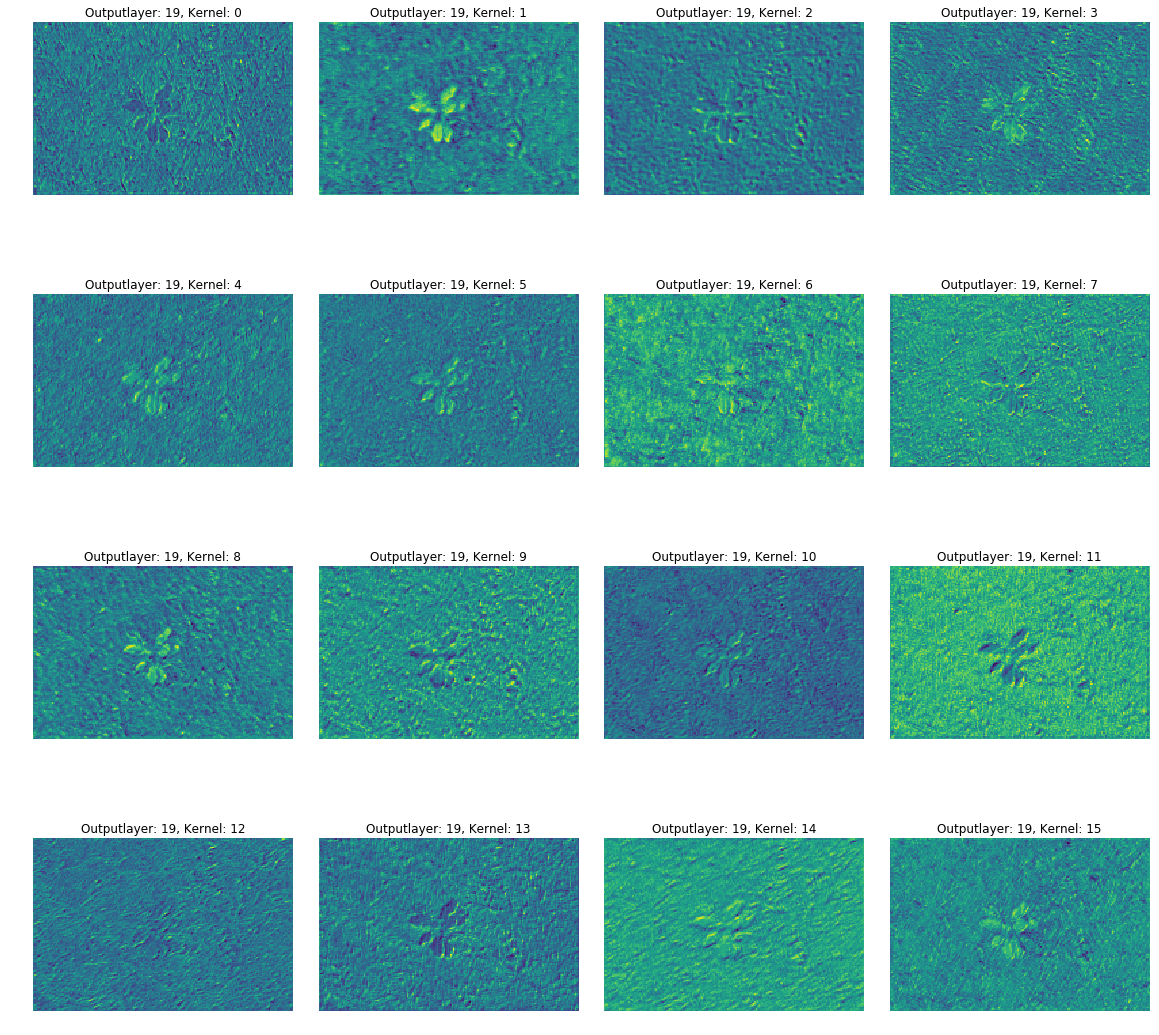

In [13]:
get_intermediate_layer(19)

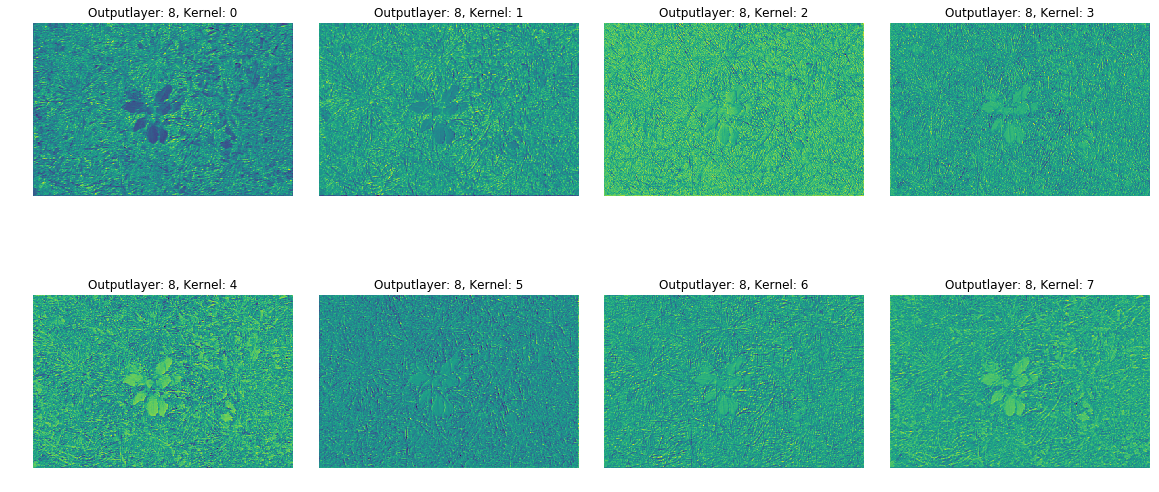

In [14]:
get_intermediate_layer(8)

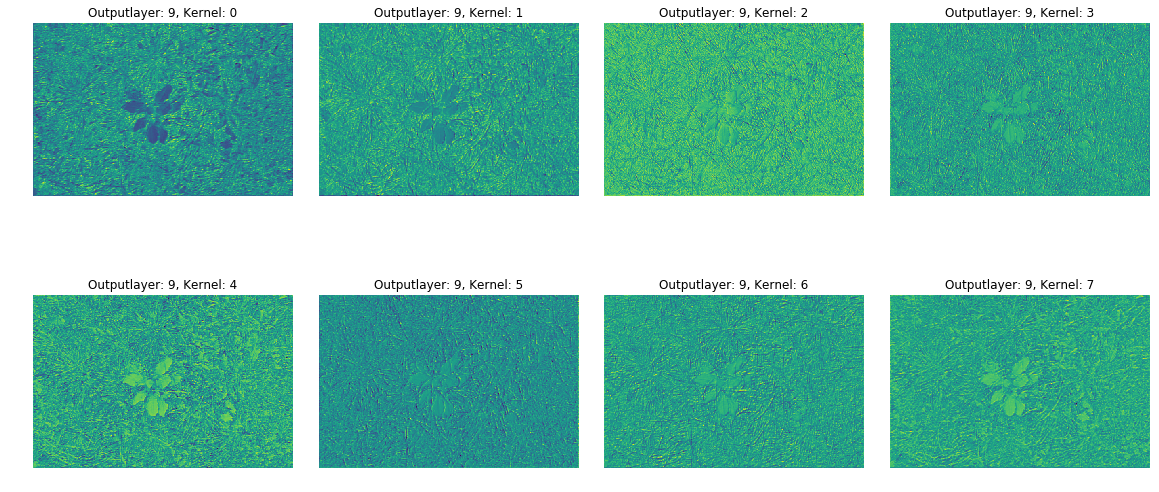

In [15]:
get_intermediate_layer(9)

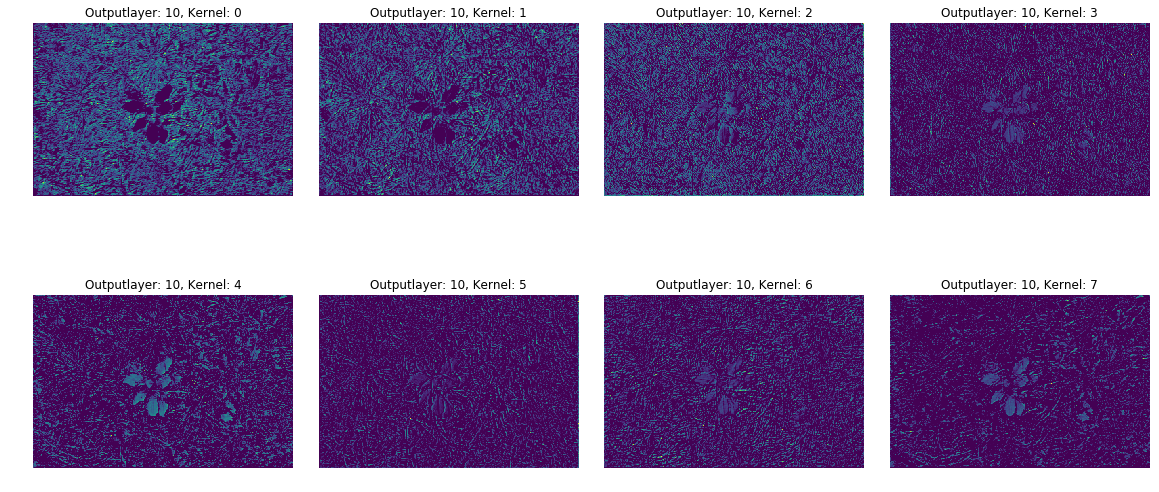

In [16]:
get_intermediate_layer(10)

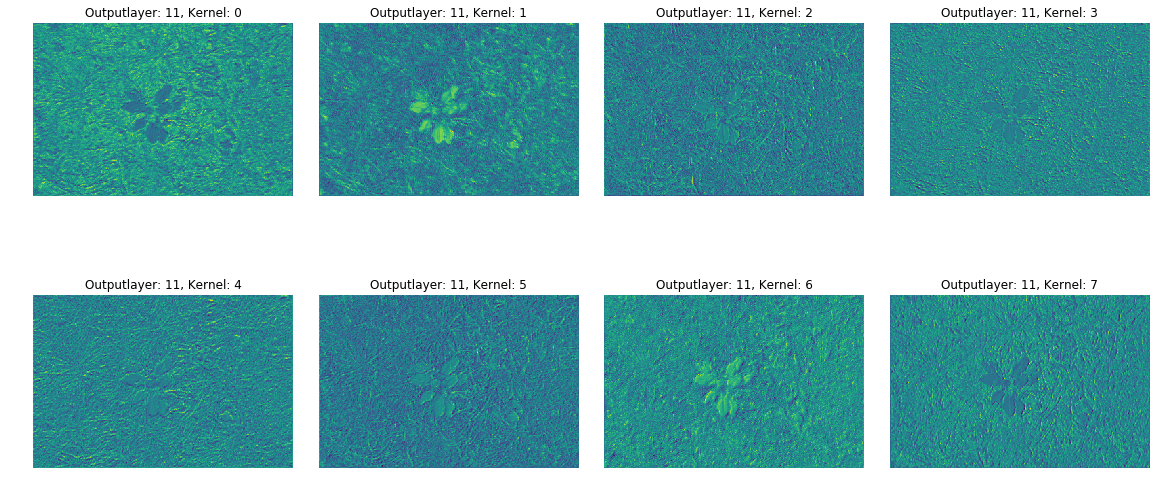

In [17]:
get_intermediate_layer(11)

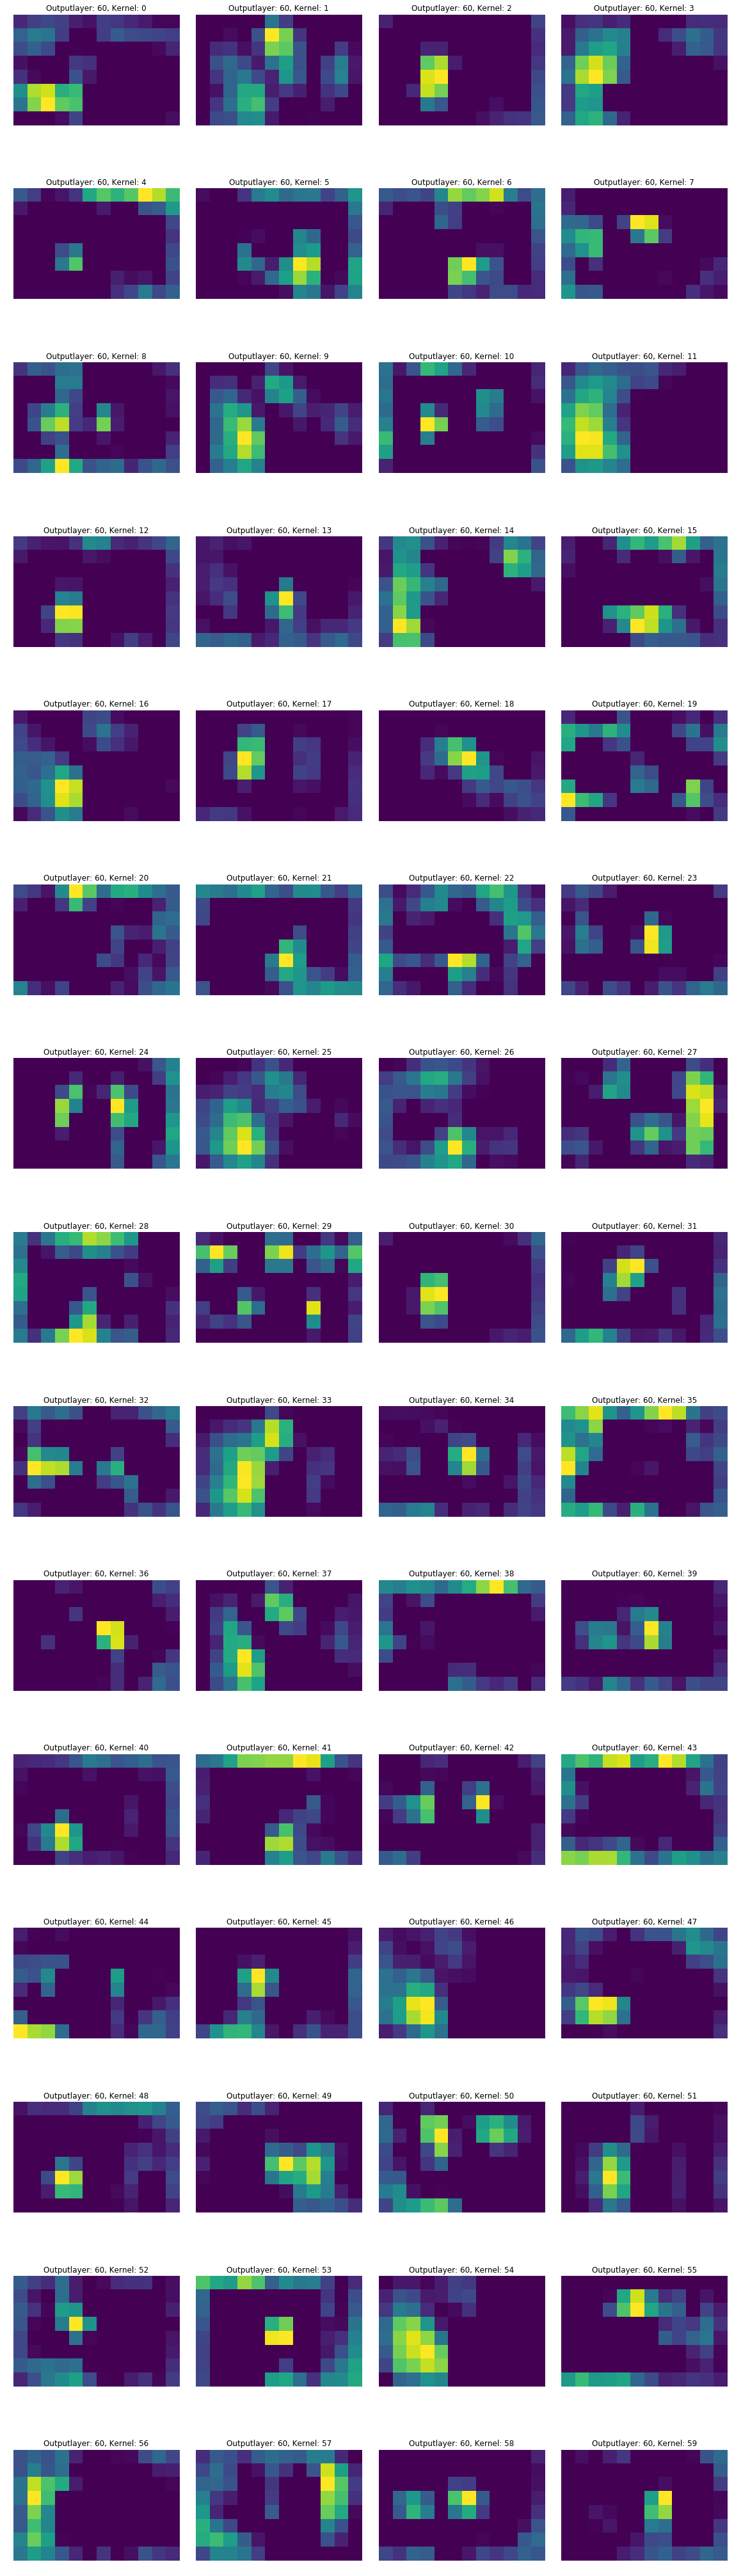

In [20]:
get_intermediate_layer(60)